## Logistic Regression (LogReg)


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,f1_score,confusion_matrix,recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
                            f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, \
                            ConfusionMatrixDisplay, RocCurveDisplay
import re

## Loading & Manipulating Data

In [3]:
## Loading in data
data = pd.read_csv("data/final_restaurant_rating_data.csv")
data.head()

,overall_rating,average_rating,average_rating_category,is_travellors_choice,is_michellin,is_in_mall,walking_distance,region_bedok,region_bishan_toa_payoh,region_bugis_city_hall,...,operates_on_sat_or_sun,average_sentiment_score,img_uploaded_per_review,proportion_of_positive_sentiment,nearest_train_line_color_blue,nearest_train_line_color_green,nearest_train_line_color_others,nearest_train_line_color_purple,nearest_train_line_color_red,nearest_train_line_color_yellow
0,4.0,3.8,0,0,0,0.0,744.5,0.0,0.0,0.0,...,1,0.276577,0.071429,0.857143,1.0,0.0,0.0,0.0,0.0,0.0
1,5.0,4.8,1,1,0,0.0,373.3,0.0,0.0,1.0,...,1,0.405635,0.292683,0.982927,0.0,0.0,0.0,0.0,0.0,1.0
2,4.5,4.7,1,1,0,0.0,227.9,0.0,0.0,0.0,...,1,0.424801,0.517665,0.971582,0.0,1.0,0.0,0.0,0.0,0.0
3,5.0,4.9,1,0,0,1.0,318.7,0.0,0.0,0.0,...,1,0.499230,0.909465,0.987654,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,4.8,1,1,0,0.0,1399.9,0.0,0.0,0.0,...,1,0.487331,0.605475,0.977456,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
## Datapoint with no sentiment score
data = data.drop([4765],axis=0).reset_index() ##7191

In [5]:
data.shape

(7191, 112)

In [6]:
X = data.drop(columns=["overall_rating","average_rating","average_rating_category","proportion_of_positive_sentiment","has_price_category"])
y = data["average_rating_category"]

In [7]:
X['average_sentiment_score'] = (X['average_sentiment_score'] + 1)/2

In [8]:
min_max_scaling_list = ['walking_distance','total_operating_hours','num_of_days_open','average_daily_operating_hours','img_uploaded_per_review']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X[min_max_scaling_list])

scaled_df = pd.DataFrame(scaled_data,columns=min_max_scaling_list)
pd.concat([X.drop(min_max_scaling_list,axis=1), scaled_df], axis=1)

,index,is_travellors_choice,is_michellin,is_in_mall,region_bedok,region_bishan_toa_payoh,region_bugis_city_hall,region_bukit_merah_southern_islands,region_bukit_timah,region_changi,...,nearest_train_line_color_green,nearest_train_line_color_others,nearest_train_line_color_purple,nearest_train_line_color_red,nearest_train_line_color_yellow,walking_distance,total_operating_hours,num_of_days_open,average_daily_operating_hours,img_uploaded_per_review
0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.044563,0.458333,1.000000,0.458333,0.017857
1,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.022336,0.116071,0.857143,0.135417,0.073171
2,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.013629,0.375000,1.000000,0.375000,0.129416
3,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.019066,0.500000,1.000000,0.500000,0.227366
4,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.083809,0.130952,1.000000,0.130833,0.151369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,7187,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.025360,0.000000,0.000000,0.000000,0.045343
7187,7188,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.032024,0.000000,0.000000,0.000000,0.135246
7188,7189,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.020551,0.000000,0.000000,0.000000,0.071888
7189,7190,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.018952,0.666667,1.000000,0.666667,0.094340


In [9]:
OHE_list = ['price_category']

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
oh_data = ohe.fit_transform(X[OHE_list]).toarray()
names = ['price_category_0', 'price_category_1', 'price_category_2', 'price_category_3']

oh_df = pd.DataFrame(oh_data,columns=names)
X = pd.concat([X.drop(OHE_list,axis=1), oh_df], axis=1)
X

,index,is_travellors_choice,is_michellin,is_in_mall,walking_distance,region_bedok,region_bishan_toa_payoh,region_bugis_city_hall,region_bukit_merah_southern_islands,region_bukit_timah,...,nearest_train_line_color_blue,nearest_train_line_color_green,nearest_train_line_color_others,nearest_train_line_color_purple,nearest_train_line_color_red,nearest_train_line_color_yellow,price_category_0,price_category_1,price_category_2,price_category_3
0,0,0,0,0.0,744.5,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0,0.0,373.3,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,1,0,0.0,227.9,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,0,0,1.0,318.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,1,0,0.0,1399.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,7187,0,0,0.0,423.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7187,7188,0,0,0.0,535.1,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7188,7189,0,0,0.0,343.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7189,7190,0,0,0.0,316.8,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
X, X_holdout, y, y_holdout = train_test_split(X, y, test_size=0.15, random_state=2022, stratify=y)

In [11]:
X.head()

,index,is_travellors_choice,is_michellin,is_in_mall,walking_distance,region_bedok,region_bishan_toa_payoh,region_bugis_city_hall,region_bukit_merah_southern_islands,region_bukit_timah,...,nearest_train_line_color_blue,nearest_train_line_color_green,nearest_train_line_color_others,nearest_train_line_color_purple,nearest_train_line_color_red,nearest_train_line_color_yellow,price_category_0,price_category_1,price_category_2,price_category_3
827,827,0,0,1.0,858.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1426,1426,0,0,0.0,278.1,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2134,2134,0,0,0.0,360.3,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4921,4922,0,0,0.0,684.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4676,4676,0,0,0.0,3096.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [12]:
X.columns

Index(['index', 'is_travellors_choice', 'is_michellin', 'is_in_mall',
       'walking_distance', 'region_bedok', 'region_bishan_toa_payoh',
       'region_bugis_city_hall', 'region_bukit_merah_southern_islands',
       'region_bukit_timah',
       ...
       'nearest_train_line_color_blue', 'nearest_train_line_color_green',
       'nearest_train_line_color_others', 'nearest_train_line_color_purple',
       'nearest_train_line_color_red', 'nearest_train_line_color_yellow',
       'price_category_0', 'price_category_1', 'price_category_2',
       'price_category_3'],
      dtype='object', length=110)

## Helper Functions

In [13]:
def evaluate_results(y_test, y_pred, y_proba, plot_confusion_matrix=True, plot_roc=False, title="Classification Results"):
    '''
    This is a helper function that we will call to print basic results statistics.
    '''
    # Create confusion matrix of validation data
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    print("Confusion Matrix:")
    if plot_confusion_matrix:
        disp = ConfusionMatrixDisplay(cm, display_labels=["Poor [0]", "Excellent [1]"])
        disp.plot(cmap=plt.cm.OrRd)
        plt.title(title,pad=5)
        plt.show()
    else:
        print(cm)
    print("TN: %s, FP: %s, FN: %s, TP: %s" %(TN, FP, FN, TP))

    # Evaluation Statistics
    # Performance of decision tree model on validation data
    print("Accuracy: {:.5f}".format(accuracy_score(y_test, y_pred)))
    print("Recall: {:.5f}".format(recall_score(y_test, y_pred)))
    print("Precision: {:.5f}".format(precision_score(y_test, y_pred)))
    print("F1: {:.5f}".format(f1_score(y_test, y_pred)))
    print("ROC_AUC: {:.5f}".format(roc_auc_score(y_test, y_proba)))      # pass in probability
    
    if plot_roc:
        disp = RocCurveDisplay.from_predictions(y_test,y_proba)
        plt.show()
def stratified_k_fold_model_fit(X, Y, model, splits=5, shuffle=False, verbose=True, plot_confusion_matrix=True, plot_roc=True, hide_fold_result=False, title=None):
    X = np.array(X)
    Y = np.array(Y)

    if shuffle:
        kf = StratifiedKFold(n_splits=splits, shuffle=shuffle, random_state=2022)
        kf.get_n_splits(X, Y)
    else:
        kf = StratifiedKFold(n_splits=splits, shuffle=shuffle)
        kf.get_n_splits(X, Y)
    
    # ----- Test ----- #
    auc_scores = [] # AUC scores
    all_y_preds = [] # predictions
    all_y_proba = [] # probabilities
    all_y_true = [] # true labels

    # ----- Train ----- #
    train_auc_scores = [] # AUC scores
    train_y_preds = [] # predictions
    train_y_proba = [] # probabilities
    train_true = [] # true labels

    for train, test in kf.split(X, Y):
        # get the current train and test sets (for this particular fold)
        X_train, Y_train = X[train], Y[train]
        X_test, Y_test = X[test], Y[test]
        
        model_fit = model.fit(X_train, Y_train.ravel())

        # predict on training set
        y_pred_train = model_fit.predict(X_train)
        y_proba_train = model_fit.predict_proba(X_train)
        train_y_preds.extend(y_pred_train)
        train_y_proba.extend(y_proba_train[:, 1])
        train_true.extend(Y_train)
        
        # predict on validation set
        # y_pred = model_fit.predict(X_test)
        y_proba = model_fit.predict_proba(X_test)
        y_pred = [1 if y_prob >= 0.5 else 0 for y_prob in y_proba[:, 1]]

        if verbose and not hide_fold_result:
            print('-'*20 + ' Fold Result' + '-'*20)
            evaluate_results(Y_test, y_pred, y_proba[:, 1], plot_confusion_matrix=False, plot_roc=False, title=title)

        all_y_preds.extend(y_pred)
        all_y_proba.extend(y_proba[:, 1])
        all_y_true.extend(Y_test)
    
    # Evaluate results
    if verbose:
        print('-'*20 + ' Overall Train Result' + '-'*20)
        evaluate_results(train_true, train_y_preds, train_y_proba, plot_confusion_matrix=plot_confusion_matrix, plot_roc=plot_roc, title=title)
        print('-'*20 + ' Overall Test Result' + '-'*20)
        evaluate_results(all_y_true, all_y_preds, all_y_proba, plot_confusion_matrix=plot_confusion_matrix, plot_roc=plot_roc, title=title)
        
    return roc_auc_score(train_true, train_y_proba), roc_auc_score(all_y_true, all_y_proba)

## Model 0

-------------------- Overall Train Result--------------------
Confusion Matrix:


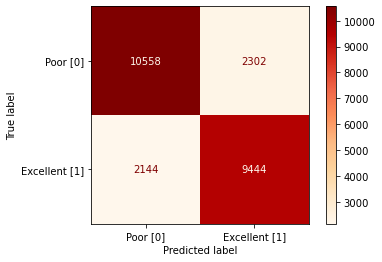

TN: 10558, FP: 2302, FN: 2144, TP: 9444
Accuracy: 0.81814
Recall: 0.81498
Precision: 0.80402
F1: 0.80946
ROC_AUC: 0.90360


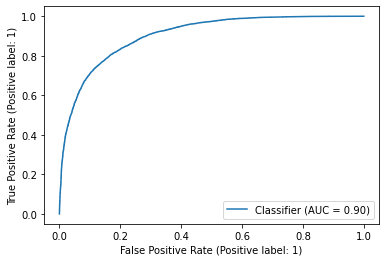

-------------------- Overall Test Result--------------------
Confusion Matrix:


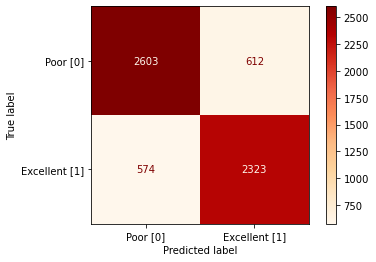

TN: 2603, FP: 612, FN: 574, TP: 2323
Accuracy: 0.80596
Recall: 0.80186
Precision: 0.79148
F1: 0.79664
ROC_AUC: 0.89329


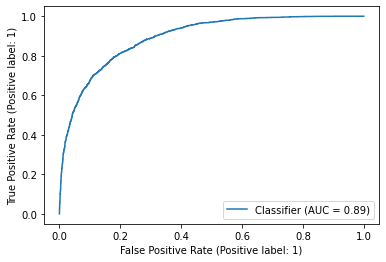

In [14]:
lr_model = LogisticRegression(penalty="l1" ,solver='liblinear',max_iter=2000)

roc_auc_train_model0, roc_auc_test_mode0 = stratified_k_fold_model_fit(X,y, lr_model, 5, shuffle=True, hide_fold_result=True)

## Model 1

In [15]:
## P-val > 0.05, can use for model
from sklearn.feature_selection import chi2
scores, pvalues = chi2(X, y)
pvalues

array([0.00000000e+00, 2.48714111e-49, 2.00037733e-10, 6.33241489e-28,
       0.00000000e+00, 2.82419950e-01, 3.86699383e-01, 8.57228232e-01,
       8.87877128e-01, 6.54739440e-01, 1.62057852e-01, 5.60451463e-03,
       1.29671806e-01, 8.71915925e-02, 2.27920920e-01, 1.61755789e-02,
       2.39617017e-01, 3.31819032e-04, 2.22642805e-06, 4.61166469e-01,
       1.82412735e-16, 3.10707138e-05, 3.67019454e-02, 6.02168797e-04,
       5.09700604e-01, 7.27298529e-01, 1.64841679e-05, 1.25022343e-01,
       1.24705434e-02, 5.96894307e-02, 1.08756691e-14, 1.98491922e-01,
       7.23922745e-01, 1.62867561e-03, 1.51951757e-02, 5.79043220e-01,
       8.37239273e-01, 4.04681329e-03, 2.38613329e-04, 6.28321276e-04,
       1.52386007e-12, 6.33017462e-01, 8.50145366e-01, 1.36376572e-04,
       1.87004723e-01, 5.90233272e-01, 1.32119116e-02, 9.09708960e-01,
       2.09639619e-01, 3.66475567e-01, 4.60737585e-01, 4.87122048e-02,
       2.79515293e-02, 5.51178330e-01, 6.02839256e-01, 2.18057559e-18,
      

In [16]:
pvals_df = pd.DataFrame(pvalues,index=X.columns).rename(columns={0:'Pval'})
pvals_df = pvals_df[pvals_df.Pval > 0.05] ## Variables that are dependent.

In [17]:
X_m1_train = X[pvals_df.index]

-------------------- Overall Train Result--------------------
Confusion Matrix:


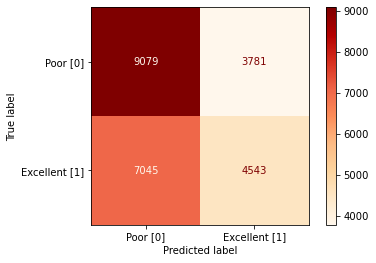

TN: 9079, FP: 3781, FN: 7045, TP: 4543
Accuracy: 0.55718
Recall: 0.39204
Precision: 0.54577
F1: 0.45631
ROC_AUC: 0.58050


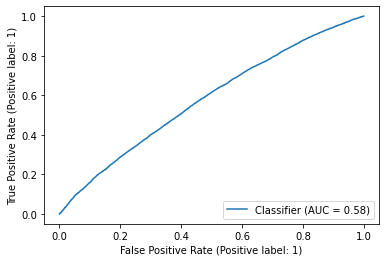

-------------------- Overall Test Result--------------------
Confusion Matrix:


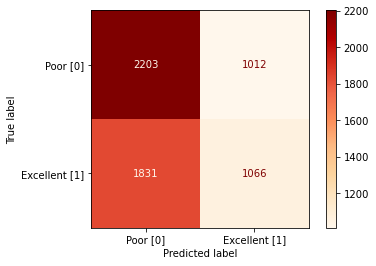

TN: 2203, FP: 1012, FN: 1831, TP: 1066
Accuracy: 0.53485
Recall: 0.36797
Precision: 0.51299
F1: 0.42854
ROC_AUC: 0.53952


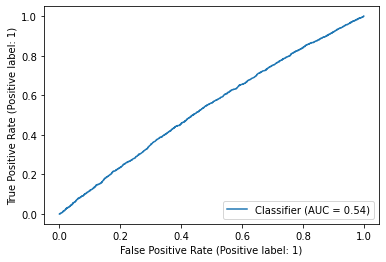

In [18]:
lr_model = LogisticRegression(penalty="l1" ,solver='liblinear',max_iter=2000)

roc_auc_train_model1, roc_auc_test_model1 = stratified_k_fold_model_fit(X_m1_train,y, lr_model, 5, shuffle=True, hide_fold_result=True)

## Model 2

In [19]:
param = {'C': [0.01,0.1,1,10,100,1000], 'penalty': ['l1']}

lr_model = LogisticRegression( solver='liblinear',max_iter=2000)
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(X,y)

# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_,max_iter=2000,solver='liblinear')
model.fit(X,y)

LogisticRegression(C=1000, max_iter=2000, penalty='l1', solver='liblinear')

In [20]:
coef = model.coef_[0]
imp_features = pd.Series(X.columns)[list(coef!=0)]
X_m2_train = X[imp_features]

-------------------- Overall Train Result--------------------
Confusion Matrix:


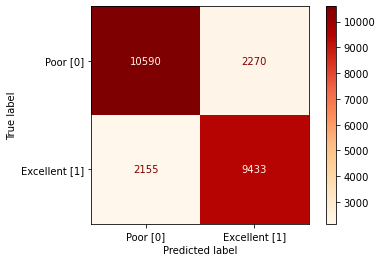

TN: 10590, FP: 2270, FN: 2155, TP: 9433
Accuracy: 0.81900
Recall: 0.81403
Precision: 0.80603
F1: 0.81001
ROC_AUC: 0.90434


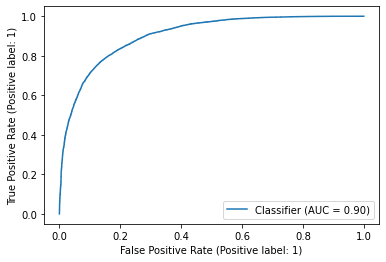

-------------------- Overall Test Result--------------------
Confusion Matrix:


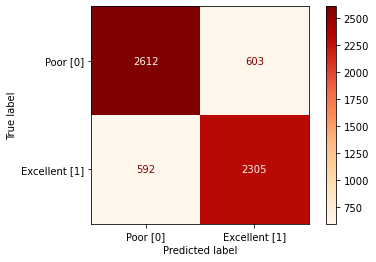

TN: 2612, FP: 603, FN: 592, TP: 2305
Accuracy: 0.80448
Recall: 0.79565
Precision: 0.79264
F1: 0.79414
ROC_AUC: 0.89230


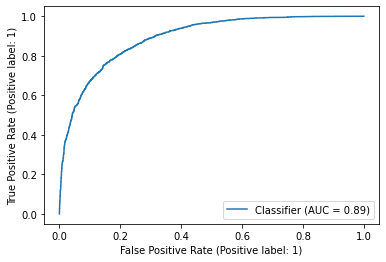

In [21]:
lr_model =  LogisticRegression(**gs_model.best_params_,max_iter=2000,solver='liblinear')

roc_auc_train_model2, roc_auc_test_model2 = stratified_k_fold_model_fit(X_m2_train,y, lr_model, 5, shuffle=True, hide_fold_result=True)

## Final Model (Model 2)

In [23]:
lr_model.fit(X_m2_train,y)

LogisticRegression(C=1000, max_iter=2000, penalty='l1', solver='liblinear')

Confusion Matrix:


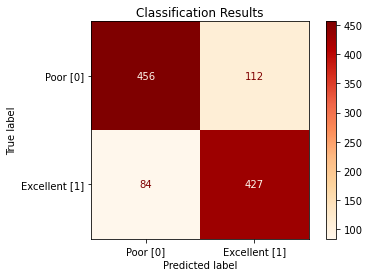

TN: 456, FP: 112, FN: 84, TP: 427
Accuracy: 0.81835
Recall: 0.83562
Precision: 0.79221
F1: 0.81333
ROC_AUC: 0.89438


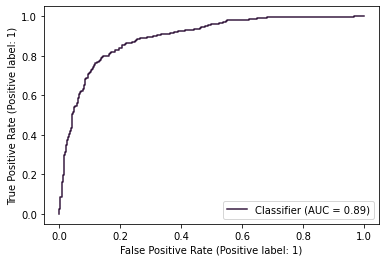

In [33]:
evaluate_results(y_holdout, lr_model.predict(X_holdout[imp_features]), lr_model.predict_proba(X_holdout[imp_features])[:, 1], plot_confusion_matrix=True, plot_roc=True, title="Classification Results")

## Feature Importance

In [24]:
import seaborn as sns

sns.set_palette("rocket")
pal = sns.color_palette("rocket")
hex_colors = pal.as_hex()

In [25]:
target_rating_variable = [
    # 'overall_rating',
    # 'average_rating',
    'average_rating_category',
]

region_ohe = [
    'region_bedok',
    'region_bishan_toa_payoh',
    'region_bugis_city_hall',
    'region_bukit_merah_southern_islands',
    'region_bukit_timah',
    'region_changi',
    'region_downtown',
    'region_geylang',
    'region_kallang',
    'region_marina_bay',
    'region_marina_centre',
    'region_newton_orchard',
    'region_north_region',
    'region_northeast_region',
    'region_novena',
    'region_outram',
    'region_paya_lebar_tampines_pasir_ris',
    'region_queenstown',
    'region_rochor',
    'region_singapore_river',
    'region_tanglin',
    'region_west_region',
]

nearby_attraction_ohe = [
    'nearby_attraction_arab_street',
    'nearby_attraction_boat_quay',
    'nearby_attraction_chinatown',
    'nearby_attraction_east_coast_park',
    'nearby_attraction_garden',
    'nearby_attraction_little_india',
    'nearby_attraction_marina_bay',
    'nearby_attraction_merlion_park',
    'nearby_attraction_museum',
    'nearby_attraction_observation',
    'nearby_attraction_orchard_road',
    'nearby_attraction_wildlife',
    'nearby_attraction_nan',
]

nearby_attraction_feature_cross = [
    'nearby_attraction_arab_street_above_median',
    'nearby_attraction_boat_quay_above_median',
    'nearby_attraction_chinatown_above_median',
    'nearby_attraction_east_coast_park_above_median',
    'nearby_attraction_garden_above_median',
    'nearby_attraction_little_india_above_median',
    'nearby_attraction_marina_bay_above_median',
    'nearby_attraction_merlion_park_above_median',
    'nearby_attraction_museum_above_median',
    'nearby_attraction_observation_above_median',
    'nearby_attraction_orchard_road_above_median',
    'nearby_attraction_wildlife_above_median',
]

meal_ohe = [
    'meal_lunch',
    'meal_dinner',
    'meal_drinks',
    'meal_breakfast',
    'meal_brunch',
    'meal_after_hours',
    'has_meals',
]

cuisine_ohe = [
    'cuisine_arabic',
    'cuisine_asian',
    'cuisine_chinese',
    'cuisine_european',
    'cuisine_indian',
    'cuisine_international',
    'cuisine_italian',
    'cuisine_japanese',
    'cuisine_south_american',
    'cuisine_north_american',
    'cuisine_others',
    'cuisine_sea',
    'has_cuisines',
]

feature_ohe = [
    'feature_delivery',
    'feature_reservations',
    'feature_outdoor_seating',
    'feature_seating',
    'feature_highchairs_available',
    'feature_digital_payments',
    'feature_free_wifi',
    'feature_cash_only',
    'feature_wheelchair_accessible',
    'feature_table_service',
    'feature_live_music',
    'feature_parking_avail',
    'feature_alcohol_avail',
    'feature_creditcard_avail',
    'has_features',    
]

diet_ohe = [
    'diet_vegetarian_friendly',
    'diet_vegan_options',
    'diet_gluten_free_options',
    'diet_halal',    
]

train_station_ohe = [
    'nearest_train_line_color_blue',
    'nearest_train_line_color_green',
    'nearest_train_line_color_others',
    'nearest_train_line_color_purple',
    'nearest_train_line_color_red',
    'nearest_train_line_color_yellow',    
]

price_features=  [
    'has_price_category',
    'price_category',
]

other_features = [
    'average_sentiment_score',
    'img_uploaded_per_review',
    'proportion_of_positive_sentiment',
    'is_travellors_choice',
    'is_michellin',
    'is_in_mall',
    'walking_distance',
    'above_median_dist_from_nearby_attraction'
]

operating_hours_featueres = [
    'total_operating_hours',
    'num_of_days_open',
    'average_daily_operating_hours',
    'operates_on_weekends',
    'operates_on_sat_or_sun',
    'has_operating_hours'
]

dct_feature_category = {}

for col in region_ohe:
    dct_feature_category[col] = "Region OHE"

for col in nearby_attraction_ohe:
    dct_feature_category[col] = "Nearby Attraction OHE"

for col in nearby_attraction_feature_cross:
    dct_feature_category[col] = "Nearby Attraction Feature Cross"

for col in meal_ohe:
    dct_feature_category[col] = "Meal OHE"

for col in cuisine_ohe:
    dct_feature_category[col] = "Cuisine OHE"

for col in feature_ohe:
    dct_feature_category[col] = "Feature OHE"

for col in diet_ohe:
    dct_feature_category[col] = "Diet OHE"

for col in train_station_ohe:
    dct_feature_category[col] = "Nearest Train Station Color OHE"    

for col in train_station_ohe:
    dct_feature_category[col] = "Nearest Train Station Color OHE"    

for col in price_features:
    dct_feature_category[col] = "Price Features"

for col in operating_hours_featueres:
    dct_feature_category[col] = "Operating Hours Features"

for col in other_features:
    dct_feature_category[col] = re.sub("_", " ", col).title()


In [26]:
df_coef = pd.DataFrame(list(zip(X_m2_train.columns, lr_model.coef_[0])), columns=['features', 'coef'])
df_coef["feature_category"] = df_coef["features"].map(dct_feature_category)
df_coef

,features,coef,feature_category
0,index,-0.001086,NaN
1,is_travellors_choice,0.583941,Is Travellors Choice
2,is_michellin,-0.505665,Is Michellin
3,is_in_mall,-0.432178,Is In Mall
4,walking_distance,0.000056,Walking Distance
...,...,...,...
105,nearest_train_line_color_yellow,-1.671263,Nearest Train Station Color OHE
106,price_category_0,-0.997802,NaN
107,price_category_1,-1.647237,NaN
108,price_category_2,-1.998962,NaN


In [27]:
df_coef.sort_values('coef', ascending=False).iloc[:20,:]

,features,coef,feature_category
98,average_sentiment_score,20.534687,Average Sentiment Score
70,cuisine_others,1.634456,Cuisine OHE
97,operates_on_sat_or_sun,0.975766,Operating Hours Features
45,nearby_attraction_garden_above_median,0.761635,Nearby Attraction Feature Cross
85,feature_parking_avail,0.662276,Feature OHE
1,is_travellors_choice,0.583941,Is Travellors Choice
99,img_uploaded_per_review,0.472918,Img Uploaded Per Review
73,feature_delivery,0.458640,Feature OHE
79,feature_free_wifi,0.435609,Feature OHE
43,nearby_attraction_chinatown_above_median,0.378747,Nearby Attraction Feature Cross


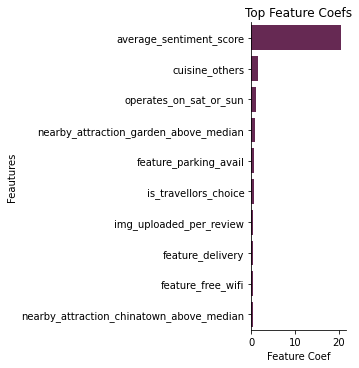

In [34]:
ax = sns.catplot(
    y = 'features',
    x = 'coef',
    data = df_coef.sort_values(by=['coef'], ascending=False).head(10),
    kind='bar',
    # hue='feature_category',
    color=hex_colors[1]
)

# ax.fig.gca().set(xlim=(3.5,4.1))
ax.fig.gca().set_title("Top Feature Coefs")
ax.fig.gca().set_ylabel("Feautures")
ax.fig.gca().set_xlabel("Feature Coef")
plt.show()

In [29]:
df_coef.groupby(["feature_category"]).agg({"coef": ["min", "max", "mean"], "features": ["count"]}).sort_values(by=[("coef", "mean")], ascending=False)

coef                        \
                                                min        max       mean   
feature_category                                                            
Average Sentiment Score                   20.534687  20.534687  20.534687   
Is Travellors Choice                       0.583941   0.583941   0.583941   
Img Uploaded Per Review                    0.472918   0.472918   0.472918   
Nearby Attraction Feature Cross           -0.605790   0.761635   0.095343   
Operating Hours Features                  -0.662363   0.975766   0.068416   
Cuisine OHE                               -0.480403   1.634456   0.010190   
Walking Distance                           0.000056   0.000056   0.000056   
Meal OHE                                  -0.422299   0.309978  -0.060637   
Above Median Dist From Nearby Attraction  -0.067844  -0.067844  -0.067844   
Diet OHE                                  -0.818308   0.156834  -0.198196   
Feature OHE                               -0.934670   0.662276  -0.210741   
Is In Mall                                -0.432178  -0.432178  -0.432178   
Is Michellin                              -0.505665  -0.505665  -0.505665   
Nearest Train Station Color OHE           -1.689811  -1.428155  -1.547446   
Region OHE                                -2.267050  -1.108040  -1.712570   
Nearby Attraction OHE                     -2.130716  -0.989927  -1.775361   

                                         features  
                                            count  
feature_category                                   
Average Sentiment Score                         1  
Is Travellors Choice                            1  
Img Uploaded Per Review                         1  
Nearby Attraction Feature Cross                12  
Operating Hours Features                        6  
Cuisine OHE                                    13  
Walking Distance                                1  
Meal OHE                                        7  
Above Median Dist From Nearby Attraction        1  
Diet OHE                                        4  
Feature OHE                                    15  
Is In Mall                                      1  
Is Michellin                                    1  
Nearest Train Station Color OHE                 6  
Region OHE                                     22  
Nearby Attraction OHE                          13

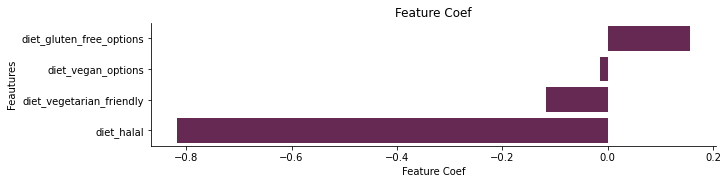

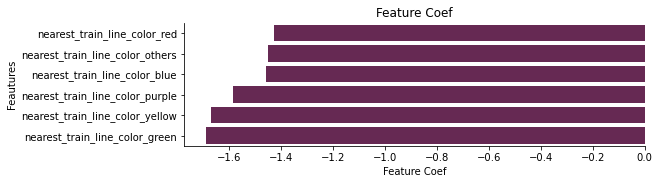

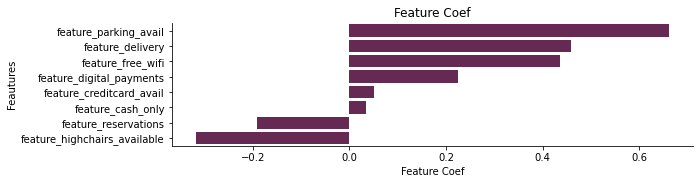

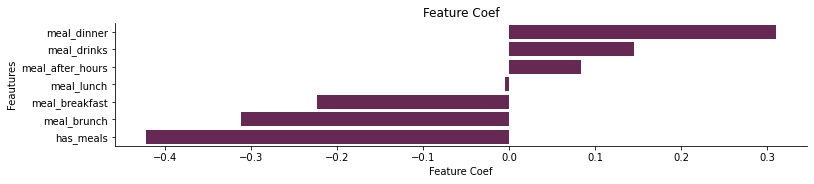

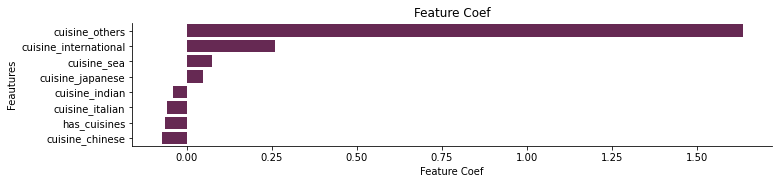

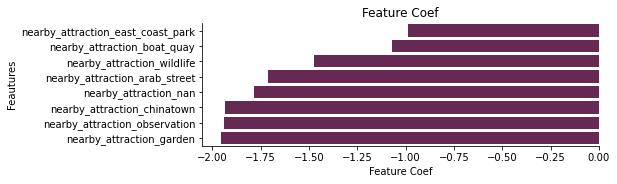

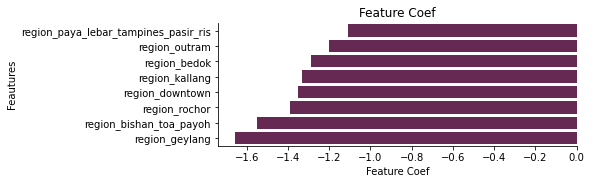

In [30]:
for i in ["Diet OHE", "Nearest Train Station Color OHE", "Feature OHE", "Meal OHE", "Cuisine OHE", "Nearby Attraction OHE", "Region OHE"]:
    ax = sns.catplot(
        y = 'features',
        x = 'coef',
        data = df_coef[df_coef["feature_category"]==i].sort_values(by=['coef'], ascending=False).head(8),
        kind='bar',
        # hue='feature_category',
        color=hex_colors[1]
    )

    # ax.fig.gca().set(xlim=(3.5,4.1))
    ax.fig.set_figheight(2)
    ax.fig.set_figwidth(15)
    ax.fig.gca().set_title("Feature Coef")
    ax.fig.gca().set_ylabel("Feautures")
    ax.fig.gca().set_xlabel("Feature Coef")
    plt.show()